In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import FramePair
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

import matplotlib as mpl
mpl.rcParams['font.size'] = 32

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
fname = "/home/charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True)

Output files: /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/home/charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: False
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [6]:
all_frames = project_data.raw_frames

In [7]:
all_matches = project_data.raw_matches

# Starting from a single frame, match to others in the future that (we hope) are similar in posture and therefore (we hope) better matches

In [14]:
from DLC_for_WBFM.utils.pipeline.long_range_matching import long_range_matches_from_config

In [15]:
df_new, final_matching, global_tracklet_neuron_graph, worm_obj, all_long_range_matches = long_range_matches_from_config(fname, to_save=False)

Output files: /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/home/charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: False
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



  0%|          | 0/16624 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

Calculating matches for pair: (0, 1)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1, extended 90 tracks
Calculating matches for pair: (0, 16)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 16, extended 100 tracks
Calculating matches for pair: (0, 17)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 17, extended 105 tracks
Calculating matches for pair: (0, 18)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 18, extended 102 tracks
Calculating matches for pair: (0, 19)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 19, extended 102 tracks
Calculating matches for pair: (0, 39)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 39, extended 61 tracks
Calculating matches for pair: (0, 40)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 40, extended 77 tracks
Calculating matches for pair: (0, 41)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 41, extended 49 tracks
Calculating matches for pair: (0, 72)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 72, extended 82 tracks
Calculating matches for pair: (0, 73)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 73, extended 75 tracks
Calculating matches for pair: (0, 74)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 74, extended 69 tracks
Calculating matches for pair: (0, 84)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 84, extended 75 tracks
Calculating matches for pair: (0, 85)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 85, extended 73 tracks
Calculating matches for pair: (0, 101)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 101, extended 76 tracks
Calculating matches for pair: (0, 102)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 102, extended 61 tracks
Calculating matches for pair: (0, 182)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 182, extended 62 tracks
Calculating matches for pair: (0, 183)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 183, extended 56 tracks
Calculating matches for pair: (0, 184)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 184, extended 63 tracks
Calculating matches for pair: (0, 185)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 185, extended 50 tracks
Calculating matches for pair: (0, 201)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 201, extended 57 tracks
Calculating matches for pair: (0, 202)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 202, extended 57 tracks
Calculating matches for pair: (0, 203)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 203, extended 45 tracks
Calculating matches for pair: (0, 217)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 217, extended 76 tracks
Calculating matches for pair: (0, 218)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 218, extended 66 tracks
Calculating matches for pair: (0, 219)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 219, extended 64 tracks
Calculating matches for pair: (0, 220)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 220, extended 76 tracks
Calculating matches for pair: (0, 236)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 236, extended 55 tracks
Calculating matches for pair: (0, 237)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 237, extended 69 tracks
Calculating matches for pair: (0, 238)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 238, extended 59 tracks
Calculating matches for pair: (0, 252)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 252, extended 74 tracks
Calculating matches for pair: (0, 253)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 253, extended 76 tracks
Calculating matches for pair: (0, 254)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 254, extended 95 tracks
Calculating matches for pair: (0, 255)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 255, extended 81 tracks
Calculating matches for pair: (0, 256)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 256, extended 68 tracks
Calculating matches for pair: (0, 273)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 273, extended 63 tracks
Calculating matches for pair: (0, 288)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 288, extended 66 tracks
Calculating matches for pair: (0, 289)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 289, extended 68 tracks
Calculating matches for pair: (0, 290)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 290, extended 59 tracks
Calculating matches for pair: (0, 291)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 291, extended 73 tracks
Calculating matches for pair: (0, 292)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 292, extended 67 tracks
Calculating matches for pair: (0, 322)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 322, extended 59 tracks
Calculating matches for pair: (0, 323)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 323, extended 74 tracks
Calculating matches for pair: (0, 324)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 324, extended 75 tracks
Calculating matches for pair: (0, 325)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 325, extended 52 tracks
Calculating matches for pair: (0, 338)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 338, extended 61 tracks
Calculating matches for pair: (0, 339)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 339, extended 47 tracks
Calculating matches for pair: (0, 372)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 372, extended 64 tracks
Calculating matches for pair: (0, 373)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 373, extended 53 tracks
Calculating matches for pair: (0, 386)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 386, extended 74 tracks
Calculating matches for pair: (0, 387)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 387, extended 65 tracks
Calculating matches for pair: (0, 388)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 388, extended 62 tracks
Calculating matches for pair: (0, 389)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 389, extended 73 tracks
Calculating matches for pair: (0, 402)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 402, extended 52 tracks
Calculating matches for pair: (0, 403)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 403, extended 50 tracks
Calculating matches for pair: (0, 404)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 404, extended 59 tracks
Calculating matches for pair: (0, 405)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 405, extended 56 tracks
Calculating matches for pair: (0, 423)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 423, extended 90 tracks
Calculating matches for pair: (0, 424)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 424, extended 67 tracks
Calculating matches for pair: (0, 425)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 425, extended 69 tracks
Calculating matches for pair: (0, 438)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 438, extended 55 tracks
Calculating matches for pair: (0, 439)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 439, extended 71 tracks
Calculating matches for pair: (0, 440)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 440, extended 60 tracks
Calculating matches for pair: (0, 441)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 441, extended 67 tracks
Calculating matches for pair: (0, 472)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 472, extended 87 tracks
Calculating matches for pair: (0, 473)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 473, extended 54 tracks
Calculating matches for pair: (0, 474)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 474, extended 79 tracks
Calculating matches for pair: (0, 487)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 487, extended 72 tracks
Calculating matches for pair: (0, 488)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 488, extended 67 tracks
Calculating matches for pair: (0, 489)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 489, extended 54 tracks
Calculating matches for pair: (0, 504)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 504, extended 68 tracks
Calculating matches for pair: (0, 505)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 505, extended 67 tracks
Calculating matches for pair: (0, 522)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 522, extended 78 tracks
Calculating matches for pair: (0, 523)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 523, extended 66 tracks
Calculating matches for pair: (0, 524)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 524, extended 50 tracks
Calculating matches for pair: (0, 561)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 561, extended 70 tracks
Calculating matches for pair: (0, 562)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 562, extended 80 tracks
Calculating matches for pair: (0, 563)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 563, extended 87 tracks
Calculating matches for pair: (0, 582)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 582, extended 98 tracks
Calculating matches for pair: (0, 583)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 583, extended 97 tracks
Calculating matches for pair: (0, 584)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 584, extended 80 tracks
Calculating matches for pair: (0, 618)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 618, extended 56 tracks
Calculating matches for pair: (0, 619)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 619, extended 64 tracks
Calculating matches for pair: (0, 632)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 632, extended 51 tracks
Calculating matches for pair: (0, 633)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 633, extended 70 tracks
Calculating matches for pair: (0, 651)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 651, extended 69 tracks
Calculating matches for pair: (0, 667)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 667, extended 67 tracks
Calculating matches for pair: (0, 668)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 668, extended 60 tracks
Calculating matches for pair: (0, 682)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 682, extended 76 tracks
Calculating matches for pair: (0, 683)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 683, extended 70 tracks
Calculating matches for pair: (0, 684)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 684, extended 78 tracks
Calculating matches for pair: (0, 685)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 685, extended 71 tracks
Calculating matches for pair: (0, 698)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 698, extended 67 tracks
Calculating matches for pair: (0, 699)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 699, extended 71 tracks
Calculating matches for pair: (0, 700)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 700, extended 77 tracks
Calculating matches for pair: (0, 712)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 712, extended 65 tracks
Calculating matches for pair: (0, 713)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 713, extended 54 tracks
Calculating matches for pair: (0, 714)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 714, extended 76 tracks
Calculating matches for pair: (0, 715)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 715, extended 48 tracks
Calculating matches for pair: (0, 727)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 727, extended 66 tracks
Calculating matches for pair: (0, 728)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 728, extended 74 tracks
Calculating matches for pair: (0, 729)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 729, extended 71 tracks
Calculating matches for pair: (0, 750)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 750, extended 56 tracks
Calculating matches for pair: (0, 751)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 751, extended 60 tracks
Calculating matches for pair: (0, 752)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 752, extended 36 tracks
Calculating matches for pair: (0, 769)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 769, extended 52 tracks
Calculating matches for pair: (0, 770)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 770, extended 60 tracks
Calculating matches for pair: (0, 771)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 771, extended 72 tracks
Calculating matches for pair: (0, 795)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 795, extended 50 tracks
Calculating matches for pair: (0, 796)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 796, extended 69 tracks
Calculating matches for pair: (0, 819)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 819, extended 89 tracks
Calculating matches for pair: (0, 835)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 835, extended 56 tracks
Calculating matches for pair: (0, 836)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 836, extended 58 tracks
Calculating matches for pair: (0, 837)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 837, extended 50 tracks
Calculating matches for pair: (0, 870)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 870, extended 52 tracks
Calculating matches for pair: (0, 871)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 871, extended 75 tracks
Calculating matches for pair: (0, 872)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 872, extended 60 tracks
Calculating matches for pair: (0, 888)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 888, extended 73 tracks
Calculating matches for pair: (0, 889)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 889, extended 63 tracks
Calculating matches for pair: (0, 890)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 890, extended 69 tracks
Calculating matches for pair: (0, 904)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 904, extended 81 tracks
Calculating matches for pair: (0, 905)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 905, extended 64 tracks
Calculating matches for pair: (0, 906)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 906, extended 54 tracks
Calculating matches for pair: (0, 907)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 907, extended 62 tracks
Calculating matches for pair: (0, 922)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 922, extended 71 tracks
Calculating matches for pair: (0, 923)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 923, extended 66 tracks
Calculating matches for pair: (0, 938)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 938, extended 78 tracks
Calculating matches for pair: (0, 939)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 939, extended 68 tracks
Calculating matches for pair: (0, 955)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 955, extended 74 tracks
Calculating matches for pair: (0, 956)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 956, extended 57 tracks
Calculating matches for pair: (0, 957)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 957, extended 60 tracks
Calculating matches for pair: (0, 958)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 958, extended 65 tracks
Calculating matches for pair: (0, 972)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 972, extended 74 tracks
Calculating matches for pair: (0, 973)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 973, extended 71 tracks
Calculating matches for pair: (0, 974)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 974, extended 59 tracks
Calculating matches for pair: (0, 987)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 987, extended 74 tracks
Calculating matches for pair: (0, 988)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 988, extended 57 tracks
Calculating matches for pair: (0, 989)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 989, extended 52 tracks
Calculating matches for pair: (0, 1008)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1008, extended 68 tracks
Calculating matches for pair: (0, 1009)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1009, extended 55 tracks
Calculating matches for pair: (0, 1010)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1010, extended 74 tracks
Calculating matches for pair: (0, 1011)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1011, extended 74 tracks
Calculating matches for pair: (0, 1027)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1027, extended 64 tracks
Calculating matches for pair: (0, 1028)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1028, extended 62 tracks
Calculating matches for pair: (0, 1043)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1043, extended 78 tracks
Calculating matches for pair: (0, 1044)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1044, extended 56 tracks
Calculating matches for pair: (0, 1045)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1045, extended 55 tracks
Calculating matches for pair: (0, 1072)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1072, extended 40 tracks
Calculating matches for pair: (0, 1073)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1073, extended 60 tracks
Calculating matches for pair: (0, 1092)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1092, extended 80 tracks
Calculating matches for pair: (0, 1093)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1093, extended 66 tracks
Calculating matches for pair: (0, 1094)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1094, extended 69 tracks
Calculating matches for pair: (0, 1119)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1119, extended 63 tracks
Calculating matches for pair: (0, 1120)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1120, extended 63 tracks
Calculating matches for pair: (0, 1175)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1175, extended 101 tracks
Calculating matches for pair: (0, 1176)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1176, extended 100 tracks
Calculating matches for pair: (0, 1177)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1177, extended 96 tracks
Calculating matches for pair: (0, 1196)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1196, extended 104 tracks
Calculating matches for pair: (0, 1197)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1197, extended 95 tracks
Calculating matches for pair: (0, 1198)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1198, extended 82 tracks
Calculating matches for pair: (0, 1213)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1213, extended 55 tracks
Calculating matches for pair: (0, 1214)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1214, extended 89 tracks
Calculating matches for pair: (0, 1215)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1215, extended 97 tracks
Calculating matches for pair: (0, 1250)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1250, extended 107 tracks
Calculating matches for pair: (0, 1251)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1251, extended 107 tracks
Calculating matches for pair: (0, 1252)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1252, extended 96 tracks
Calculating matches for pair: (0, 1268)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1268, extended 64 tracks
Calculating matches for pair: (0, 1269)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1269, extended 54 tracks
Calculating matches for pair: (0, 1285)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1285, extended 44 tracks
Calculating matches for pair: (0, 1286)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1286, extended 62 tracks
Calculating matches for pair: (0, 1300)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1300, extended 79 tracks
Calculating matches for pair: (0, 1301)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1301, extended 79 tracks
Calculating matches for pair: (0, 1302)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1302, extended 60 tracks
Calculating matches for pair: (0, 1303)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1303, extended 67 tracks
Calculating matches for pair: (0, 1316)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1316, extended 75 tracks
Calculating matches for pair: (0, 1317)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1317, extended 72 tracks
Calculating matches for pair: (0, 1318)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1318, extended 49 tracks
Calculating matches for pair: (0, 1319)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1319, extended 62 tracks
Calculating matches for pair: (0, 1336)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1336, extended 44 tracks
Calculating matches for pair: (0, 1350)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1350, extended 50 tracks
Calculating matches for pair: (0, 1351)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1351, extended 49 tracks
Calculating matches for pair: (0, 1352)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1352, extended 53 tracks
Calculating matches for pair: (0, 1366)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1366, extended 71 tracks
Calculating matches for pair: (0, 1367)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1367, extended 63 tracks
Calculating matches for pair: (0, 1368)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1368, extended 53 tracks
Calculating matches for pair: (0, 1384)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1384, extended 48 tracks
Calculating matches for pair: (0, 1385)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1385, extended 78 tracks
Calculating matches for pair: (0, 1386)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1386, extended 76 tracks
Calculating matches for pair: (0, 1400)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1400, extended 52 tracks
Calculating matches for pair: (0, 1401)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1401, extended 61 tracks
Calculating matches for pair: (0, 1402)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1402, extended 72 tracks
Calculating matches for pair: (0, 1403)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1403, extended 62 tracks
Calculating matches for pair: (0, 1420)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1420, extended 69 tracks
Calculating matches for pair: (0, 1421)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1421, extended 67 tracks
Calculating matches for pair: (0, 1452)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1452, extended 45 tracks
Calculating matches for pair: (0, 1453)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1453, extended 79 tracks
Calculating matches for pair: (0, 1454)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1454, extended 101 tracks
Calculating matches for pair: (0, 1474)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1474, extended 89 tracks
Calculating matches for pair: (0, 1475)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1475, extended 81 tracks
Calculating matches for pair: (0, 1476)


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

At time 1476, extended 67 tracks


  0%|          | 0/4035 [00:00<?, ?it/s]

# Qualitative quality metrics

In [157]:
x = []
y = []
for key, match in all_long_range_matches.items():
    x.append(key[1])
    y.append(len(match.final_matches) / match.num_possible_matches)

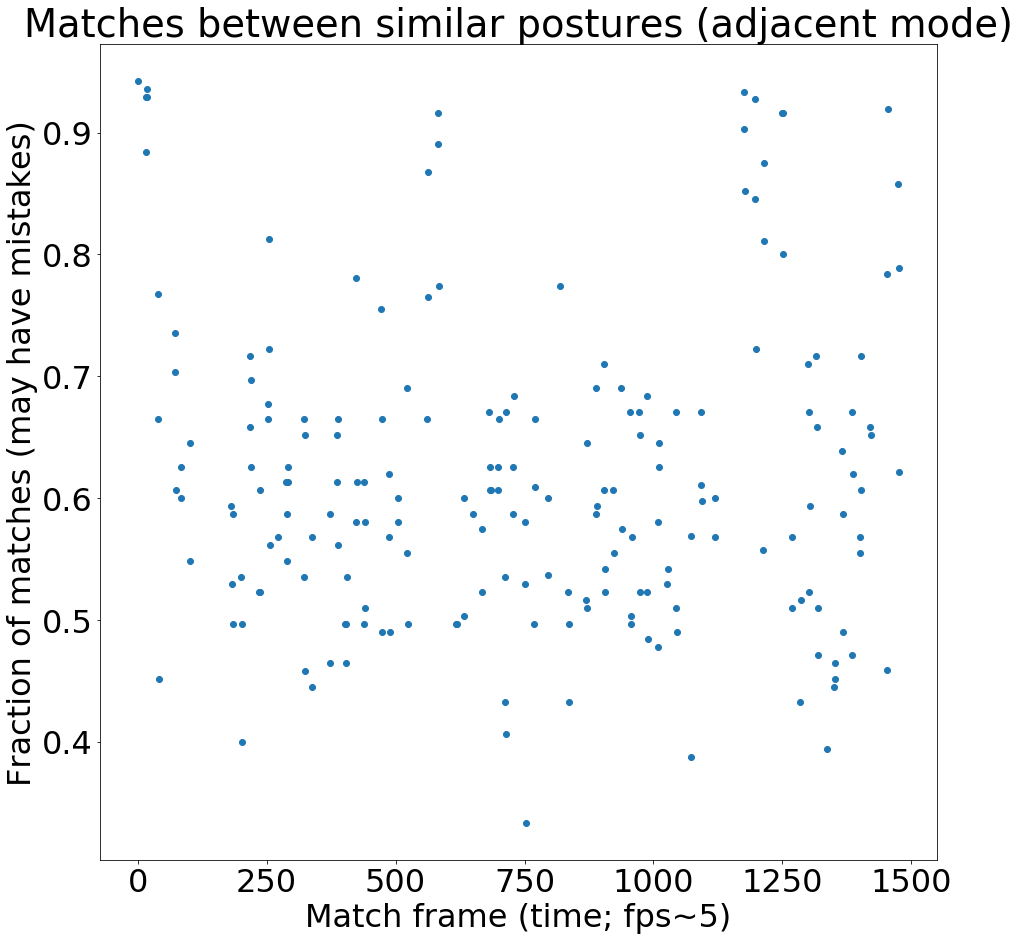

In [158]:
plt.figure(figsize=(15,15))
plt.plot(x, y, 'o')
plt.xlabel("Match frame (time; fps~5)")
plt.ylabel("Fraction of matches (may have mistakes)")
plt.title("Matches between similar postures (adjacent mode)")

plt.savefig('plots/num_matches_adjacent_reference_posture.png')

In [62]:
np.array(x)[np.argsort(y)]

array([ 752, 1072, 1336,  203,  715, 1285,  837,  713, 1350,  339, 1352,
         41,  325, 1452, 1351,  373,  403, 1384, 1318, 1009,  989, 1368,
        489,  473, 1045,  618,  524,  402,  619,  404,  836,  438,  769,
        956,  202,  185,  632,  957,  440, 1044, 1269, 1319,  872, 1286,
        870, 1302,  906,  238,  974,  988,  236,  668,  835, 1027,  750,
        183,  712,  405,  201,  322,  795, 1028,  907,  290,  102, 1400,
        923,  523, 1213,  388,  256, 1268,  273,  488,  958, 1119, 1401,
        338, 1073,  939,  667, 1008,  424,  751,  505,  441,  651,  889,
        289, 1367,  372,  727,  184,  890, 1303,  182, 1094,   85,  633,
        504,  796, 1120, 1403,  922,  698,  685,  684,  237,   74,  905,
        770, 1093,  439,  425,  387,  291,  288,  487, 1386, 1476, 1011,
        728,   84,  219,  683,  292,  699, 1366,  871,  101, 1010,  386,
       1421,  324,  973, 1420,  218, 1317,  252,  561,  323,  474,  700,
         39,  771,  389, 1385, 1301, 1043,  682,  9

In [103]:
# np.argsort(y)

In [64]:
y[3]

0.9354838709677419

In [159]:
x = []
y = []
for key, match in all_matches.items():
    x.append(key[1])
    y.append(len(match.final_matches) / match.num_possible_matches)

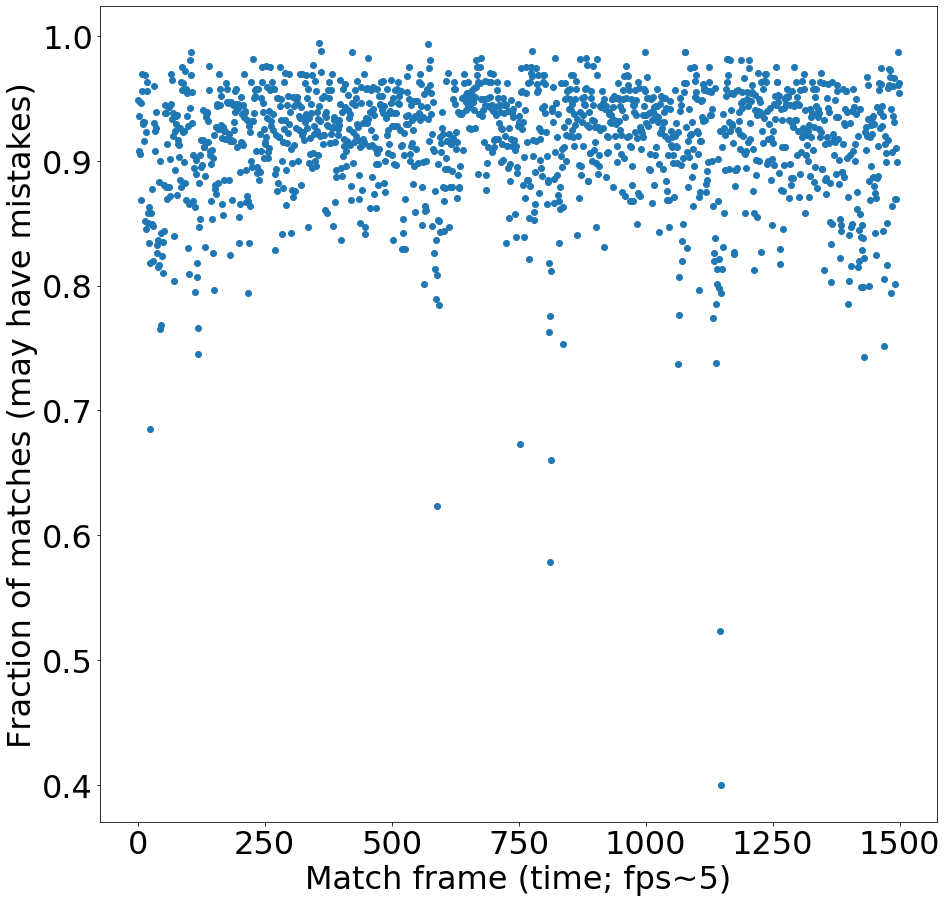

In [160]:
plt.figure(figsize=(15,15))
plt.plot(x, y, 'o')
plt.xlabel("Match frame (time; fps~5)")
plt.ylabel("Fraction of matches (may have mistakes)")

plt.savefig('plots/num_matches_default.png')

# Look at the actual matches

In [176]:
list(all_long_range_matches.keys())[:5]

[(0, 1), (0, 16), (0, 17), (0, 18), (0, 19)]

In [179]:
pair = (0, 1)
match = all_long_range_matches[pair]

In [180]:
project_data.napari_of_single_match(pair, this_match=match)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(15.5, 349.5, 449.5), zoom=1.8524320457796852, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fdb97303a90>, <Points layer 'n0_zxy_raw' at 0x7fdb138e8fd0>, <Points layer 'n1_zxy_raw' at 0x7fdab38a71d0>, <Tracks layer 'final_matches' at 0x7fdab38b2a50>, <Points layer 'Raw IDs' at 0x7fdab38b2350>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(vi

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/pyth

In [43]:
match

FramePair with 62/155 matches 

# Preorient the point clouds

In [394]:
pair = (0, 41)
import cv2
from DLC_for_WBFM.utils.visualization.visualization_tracks import visualize_tracks

In [395]:
frame0 = all_frames[pair[0]]
frame1 = all_frames[pair[1]]

In [396]:
n0 = project_data.get_centroids_as_numpy(pair[0])
n1 = project_data.get_centroids_as_numpy(pair[1])

In [397]:
match = all_long_range_matches[pair]

In [398]:
pts0 = []
pts1 = []
for m in match.final_matches:
    pts0.append(n0[m[0]])
    pts1.append(n1[m[1]])
    
pts0 = np.array(pts0)
pts1 = np.array(pts1)

val, h, inliers = cv2.estimateAffine3D(pts0, pts1, confidence=0.999)

In [399]:
neuron0_trans = cv2.transform(np.array([n0]), h)[0]

In [400]:
visualize_tracks(neuron0_trans, n1, matches = match.final_matches)

[LineSet with 70 lines.,
 PointCloud with 155 points.,
 PointCloud with 171 points.]

In [191]:
visualize_tracks(n0, n1, matches = match.final_matches)

[LineSet with 93 lines.,
 PointCloud with 155 points.,
 PointCloud with 168 points.]

# Adjacent in time long range matches

In [130]:
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import calc_FramePair_from_Frames
from tqdm.auto import tqdm
frame_pair_options = all_matches[(0, 1)].options

In [163]:
all_adjacent_long_range_matches = {}
i_previous = 0
for key, _ in tqdm(all_long_range_matches.items()):
    pair = (i_previous, key[1])
    i_previous = pair[1]
    anchor_frame = all_frames[pair[0]]
    long_range_frame = all_frames[pair[1]]
    long_range_pair = calc_FramePair_from_Frames(frame0=anchor_frame, frame1=long_range_frame,
                                                 frame_pair_options=frame_pair_options)
    all_adjacent_long_range_matches[pair] = long_range_pair

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

In [164]:
x = []
y = []
for key, match in tqdm(all_adjacent_long_range_matches.items()):
    x.append(key[1])
    match.calc_final_matches()
    y.append(len(match.final_matches) / match.num_possible_matches)

  0%|          | 0/199 [00:00<?, ?it/s]

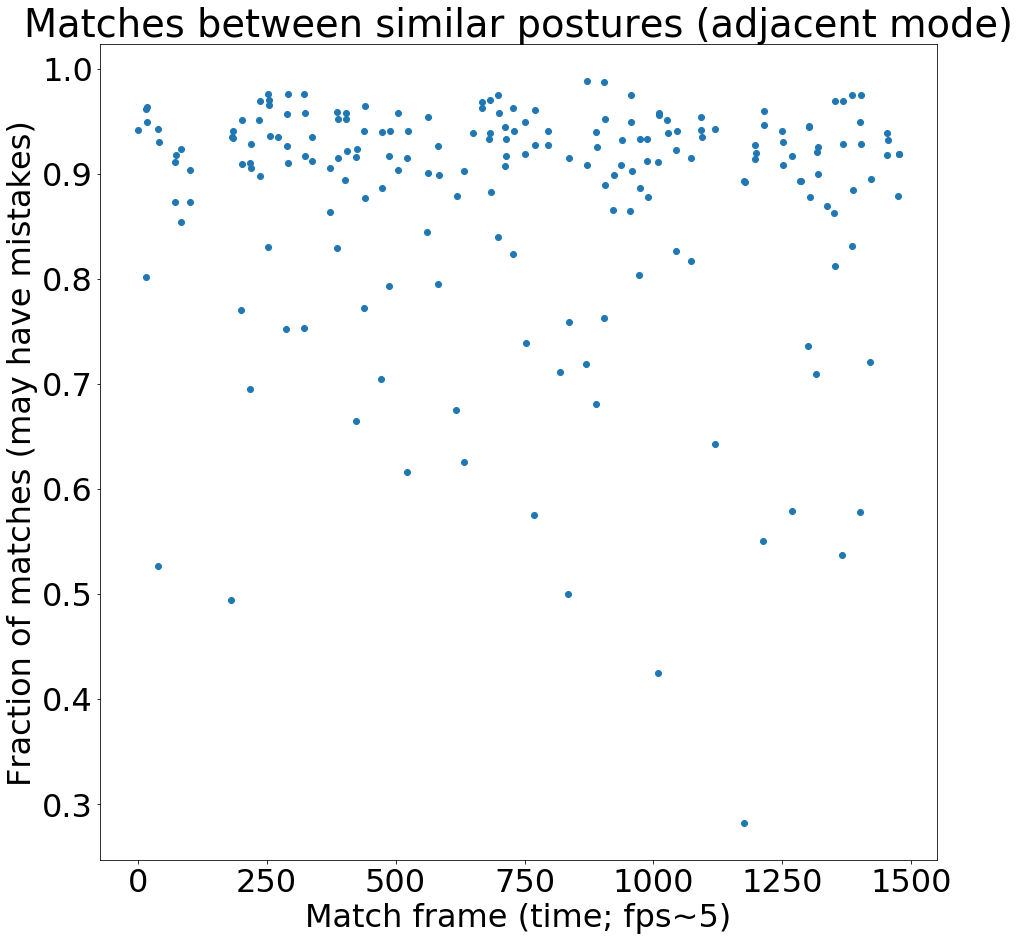

In [165]:
plt.figure(figsize=(15,15))

plt.plot(x, y, 'o')
plt.xlabel("Match frame (time; fps~5)")
plt.ylabel("Fraction of matches (may have mistakes)")
plt.title("Matches between similar postures (adjacent mode)")

plt.savefig('plots/num_matches_adjacent_similar_postures.png')

# Do the same as above, but pre-align before matching

In [173]:
list(all_adjacent_long_range_matches.keys())[:10]

[(0, 1),
 (1, 16),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 39),
 (39, 40),
 (40, 41),
 (41, 72),
 (72, 73)]

In [175]:
pair = (41, 72)
match = all_adjacent_long_range_matches[pair]

In [205]:
# project_data.napari_of_single_match(pair, this_match=match)

In [167]:
transformed_cloud, target_cloud, raw_cloud = match.align_point_clouds()

In [168]:
visualize_tracks(transformed_cloud, target_cloud, matches = match.final_matches)

[LineSet with 93 lines.,
 PointCloud with 155 points.,
 PointCloud with 168 points.]

In [267]:
transformed_cloud.shape

(155, 3)

In [169]:
val, h, inliers = match.calc_alignment_between_point_clouds()

In [345]:
h.shape

(3, 4)

In [170]:
im0, im1 = project_data.red_data[pair[0],...], project_data.red_data[pair[1],...]

In [171]:
import napari

In [227]:
# im0_transformed = cv2.warpAffine(np.array([im0]), h, im0.shape)

In [226]:
# im0_transformed = cv2.warpAffine(np.array([im0]), h, (im0.shape[0], im0.shape[1]))

In [348]:
from skimage.transform import warp
from skimage.transform import AffineTransform, ProjectiveTransform

# out = cv2.decomposeProjectionMatrix(h)

tform = AffineTransform(matrix=np.vstack([h, [0, 0, 0, 1]]))
# tform = ProjectiveTransform(matrix=h[:, :3])
im0_transformed = warp((im0.astype(float)/255.0), tform.inverse, output_shape=im0.shape)
im1_transformed = warp((im1.astype(float)/255.0), tform.inverse, output_shape=im0.shape)

ValueError: Invalid shape of transformation matrix.

In [349]:
np.vstack([h, [0, 0, 0, 1]]).shape

(4, 4)

In [289]:
v = napari.view_image(im1, ndisplay=3)
v.add_image(im0_transformed)
v.add_image(im1_transformed)

<Image layer 'im1_transformed' at 0x7fdac313ea50>

In [339]:
from skimage import transform

n0, n1 = match.calc_matched_point_clouds()

tform = transform.EuclideanTransform()
tform.estimate(n0[:, [1,2]], n1[:, [1,2]])

tform.rotation, tform.translation, tform.residuals

(2.4052711563511675,
 array([721.06550949, 548.57609329]),
 <bound method GeometricTransform.residuals of <EuclideanTransform(matrix=
     [[-7.40943927e-01, -6.71566897e-01,  7.21065509e+02],
      [ 6.71566897e-01, -7.40943927e-01,  5.48576093e+02],
      [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x7fd96d15c050>>)

In [340]:

dat0 = (im0[15,...].astype(float)/255.0)
dat1 = (im1[15,...].astype(float)/255.0)

im0_transformed = warp(dat0, tform, output_shape=dat0.shape)
im1_transformed = warp(dat1, tform, output_shape=dat1.shape)

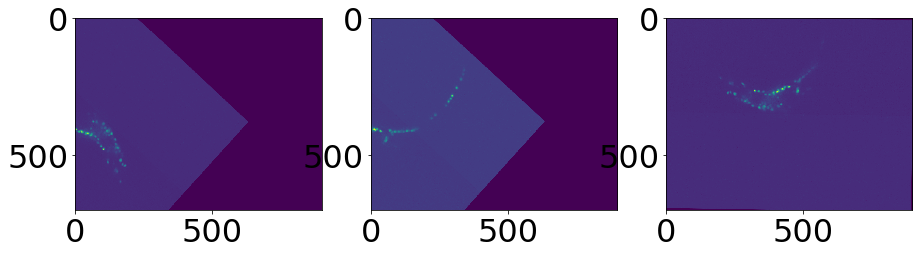

In [341]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(im0_transformed)
plt.subplot(132)
plt.imshow(im1_transformed)
plt.subplot(133)
plt.imshow(dat0)

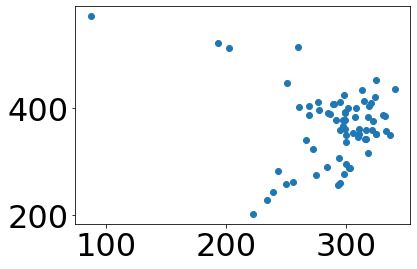

In [323]:
plt.scatter(n0[:, 1], n0[:, 2])

In [415]:
from napari.utils.transforms import Affine, CompositeAffine, ScaleTranslate
import scipy.ndimage as ndi


In [412]:
pair = (0, 18)

match = all_long_range_matches[pair]
# match = all_matches[pair]

val, h, inliers = match.calc_alignment_between_point_clouds()
napari_affine = Affine(affine_matrix=np.vstack([h, [0, 0, 0, 1]]))

In [413]:
napari_affine.func(im0).shape

(32, 700, 900)

In [418]:
im0, im1 = project_data.red_data[pair[0],...], project_data.red_data[pair[1],...]

v = napari.view_image(im1, ndisplay=3, colormap='green')
v.add_image(im0)
scipy_affine = ndi.affine_transform(im0, np.linalg.inv(napari_affine.affine_matrix), output_shape=im0.shape, order=5)
v.add_image(scipy_affine, colormap='red')

v.add_image(napari_affine.func(im0), name="im0_rotated", colormap='red')
# v.add_image(im1, affine=napari_affine, name="im1_rotated")

# transformed_cloud, target_cloud, raw_cloud = match.align_point_clouds()

# v.add_points(transformed_cloud, face_color='red')
# v.add_points(target_cloud, face_color='green')

<Image layer 'im0_rotated' at 0x7fdb576e5bd0>

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/pyth

In [417]:
1+1

.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:asyncio:Exception in callback BaseAsyncIOLoop._handle_events(2013, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(2013, 1)>
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 448, in _handle_events
    self._handle_recv()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 477, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/charles/anaconda3/envs/torc

2